# Abalone Dataset

 Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

* Sex / nominal / -- / M, F, and I (infant)
* Length / continuous / mm / Longest shell measurement
* Diameter / continuous / mm / perpendicular to length
* Height / continuous / mm / with meat in shell
* Whole weight / continuous / grams / whole abalone
* Shucked weight / continuous / grams / weight of meat
* Viscera weight / continuous / grams / gut weight (after bleeding)
* Shell weight / continuous / grams / after being dried
* Rings / integer / -- / +1.5 gives the age in years

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\baiba\Downloads\abalone.data', header=None)

df.columns = ['Sex', 'Length', 'Diameter', 'Height',
                  'Whole Weight', 'Shucked Weight', ' Viscera Weight',
                  'Shell Weight', 'Ring']

df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Ring
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4177 non-null   object 
 1   Length           4177 non-null   float64
 2   Diameter         4177 non-null   float64
 3   Height           4177 non-null   float64
 4   Whole Weight     4177 non-null   float64
 5   Shucked Weight   4177 non-null   float64
 6    Viscera Weight  4177 non-null   float64
 7   Shell Weight     4177 non-null   float64
 8   Ring             4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.shape

(4177, 9)

In [5]:
df.dtypes

Sex                 object
Length             float64
Diameter           float64
Height             float64
Whole Weight       float64
Shucked Weight     float64
 Viscera Weight    float64
Shell Weight       float64
Ring                 int64
dtype: object

In [6]:
df.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Ring
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### replace categorical value Sex, to numeric

In [4]:
df['Sex'].replace(['M', 'F', 'I'], [0,1,2], inplace = True)

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Ring
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
df.describe()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Ring
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df['Ring'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [8]:
df['Ring'].value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Ring, dtype: int64

Observation:
* we can see that target is 1 to 29 (but there is no 28), so the classification we are going to do is a multi-class classification

## Missing values

In [9]:
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Ring
1257,2,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,2,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [10]:
means = pd.pivot_table(df, index = ['Sex'], aggfunc = {'Height': np.mean})
means

,Height
Sex,
0,0.151381
1,0.158011
2,0.107996


**we will fill missing values Infants with 0.107996**

In [11]:
df['Height'] = df['Height'].replace(to_replace=0, value=0.107996)

In [12]:
(df['Height'] == 0).sum()

0

**this part starts the change**

## Adding Age column, based on the number or rings

* Rings 1-6: Age 1, child
* Rings 7-12: Age 2, young
* Rings 13-18: Age 3, adults
* Rings 19-30: Age 4, seniors 

In [13]:
def age_col(row):
    if row['Ring']>=1 and row['Ring']<=6:
        return 1
    elif row['Ring']>=7 and row['Ring']<=12:
        return 2
    elif row['Ring']>=13 and row['Ring']<=18:
        return 3
    elif row['Ring']>=19 and row['Ring']<=30:
        return 4
    return 0

In [14]:
df['Age'] = df.apply(lambda _: '', axis=1)

In [15]:
df['Age'] = df.apply(lambda row: age_col(row), axis=1)

In [16]:
df

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Ring,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,2
...,...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,2
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


## Data Visualization 

C:\Users\baiba\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


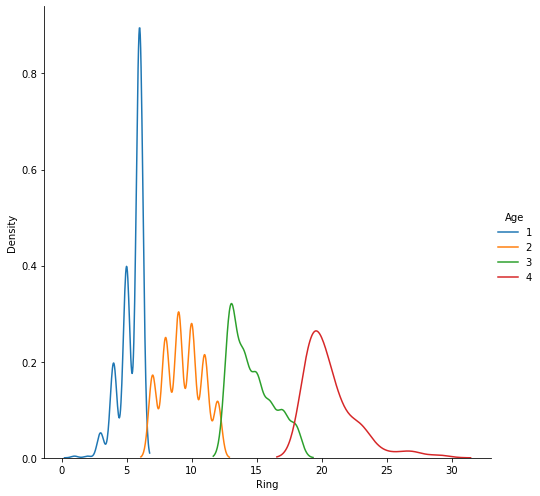

In [17]:
sns.FacetGrid(df, hue='Age', size=7) \
 .map(sns.kdeplot, "Ring") \
 .add_legend()


* Age 1: child, Age 2: young, Age 3: adults, Age 4:seniors 
* Child abalones have 1-6 rings. Young aged abalones have 7-12 rings. Adults abalones have 13-18 rings. Seniors have more than 19 rings

C:\Users\baiba\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


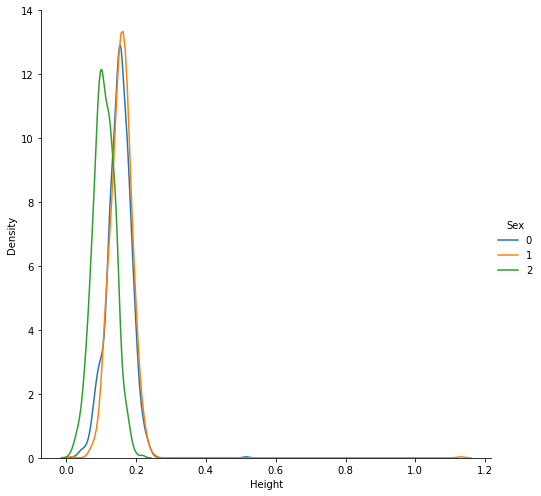

In [51]:
sns.FacetGrid(df, hue="Sex", size=7) \
  .map(sns.kdeplot, "Height") \
  .add_legend()


* Sex 0: Male,     Sex 1: Female,       Sex 2: Infants 
* Female abalones have more height than males and infants
* Height of infants is between 0 to 0.3 mm

C:\Users\baiba\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


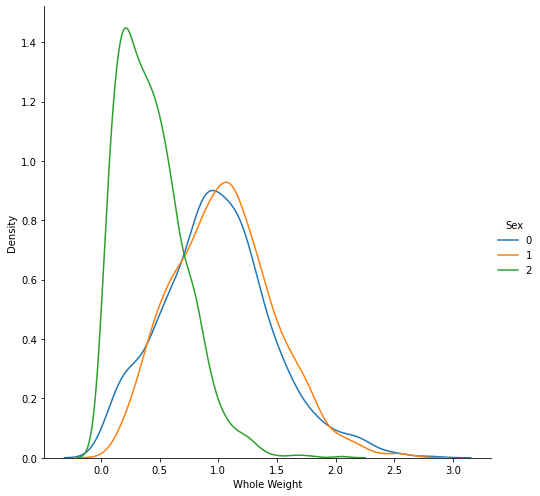

In [52]:
sns.FacetGrid(df, hue="Sex", size=7) \
   .map(sns.kdeplot, "Whole Weight") \
   .add_legend()

* Whole weight of infants are smaller compares to females and males
* Infants weight: 0.0 - 1.5 g
* Female weight: 0.0 - 2.5 g
* Male weight: 0.0 - 2.7 g 

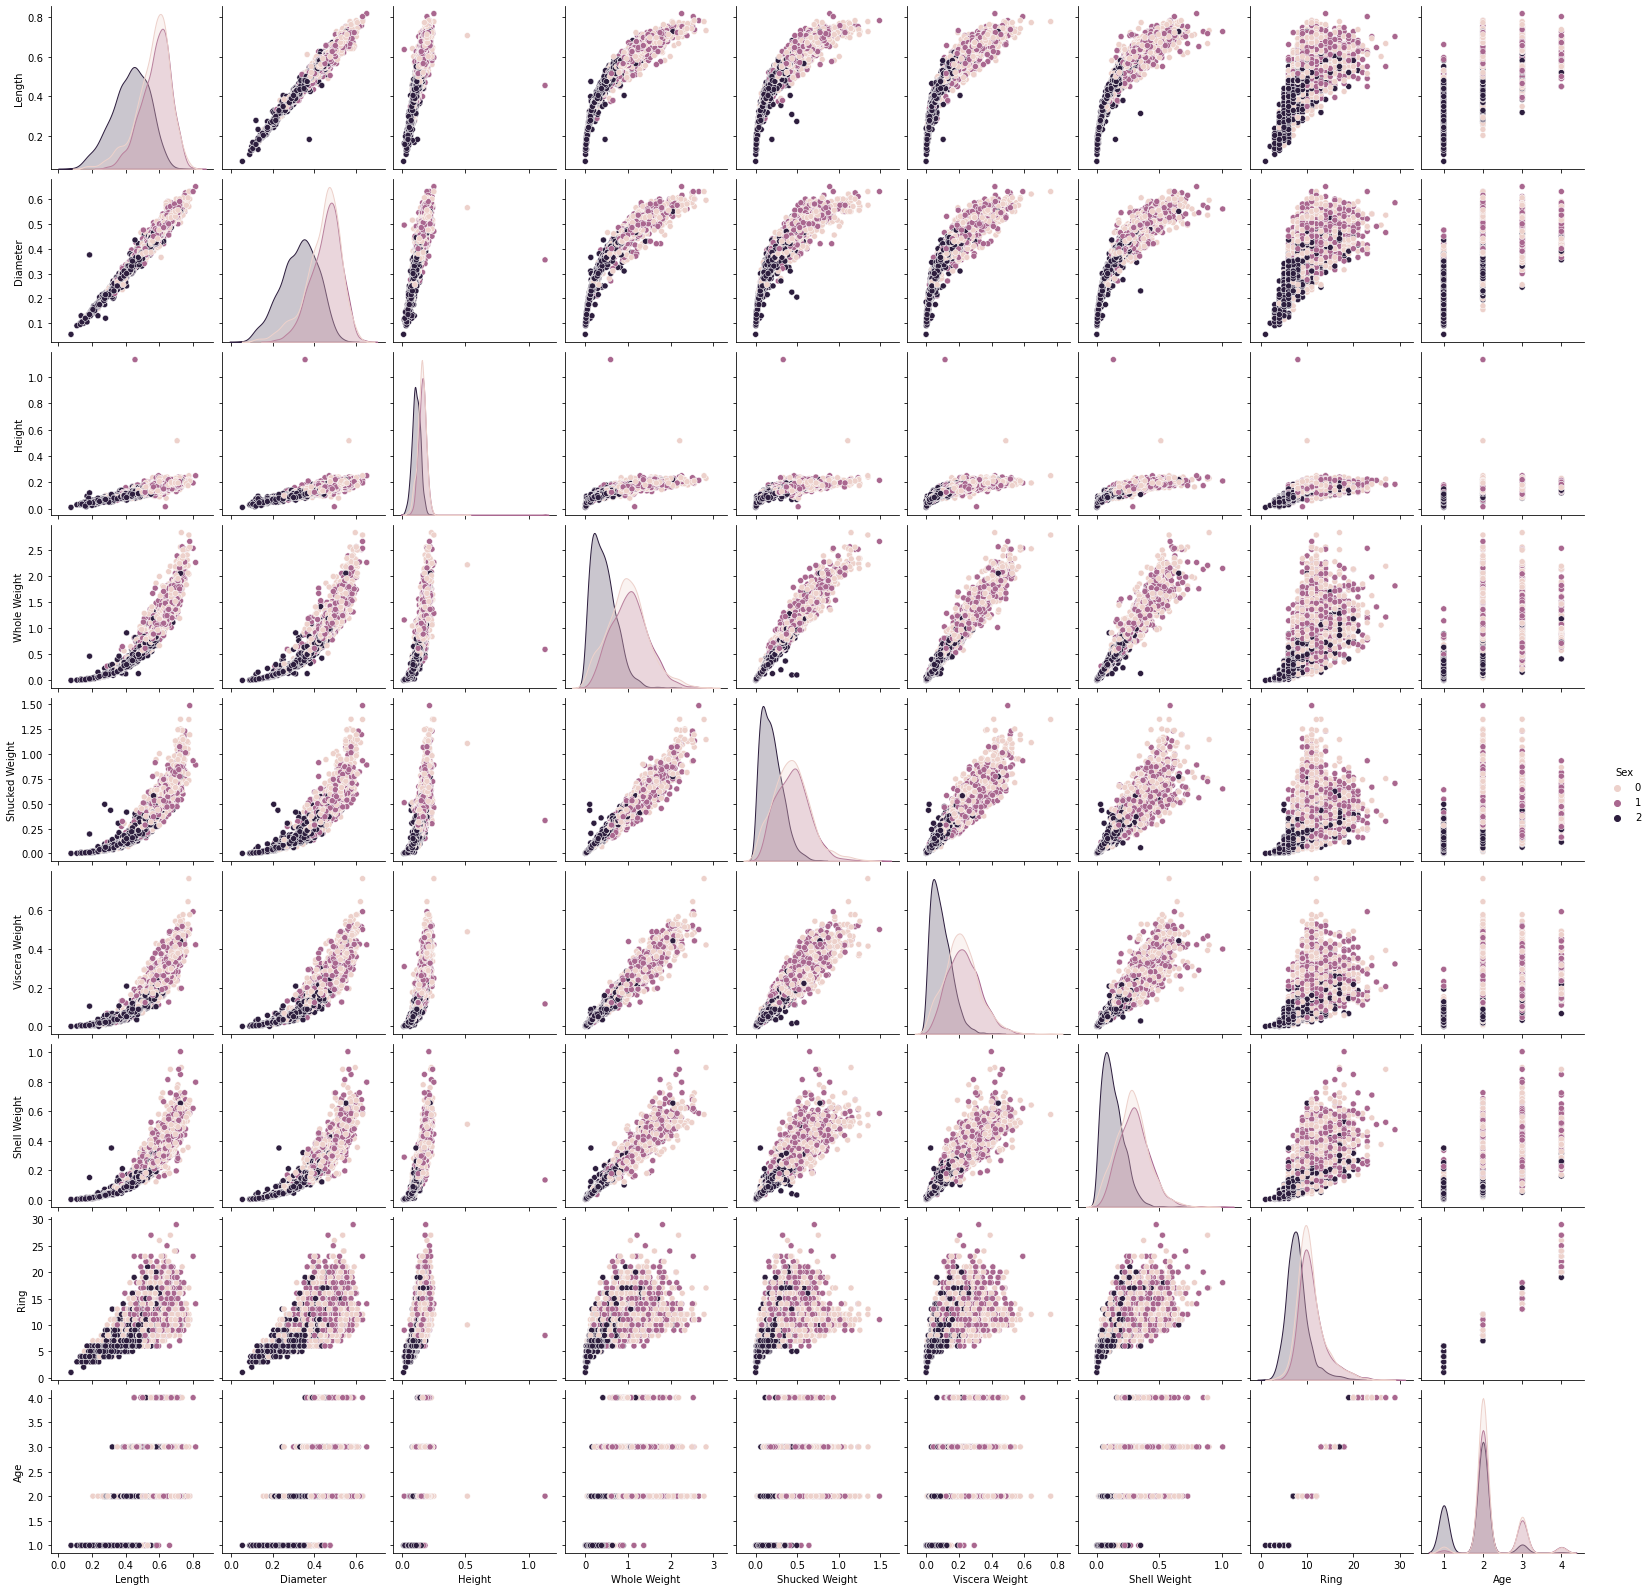

In [53]:
sns.pairplot(df, hue='Sex')

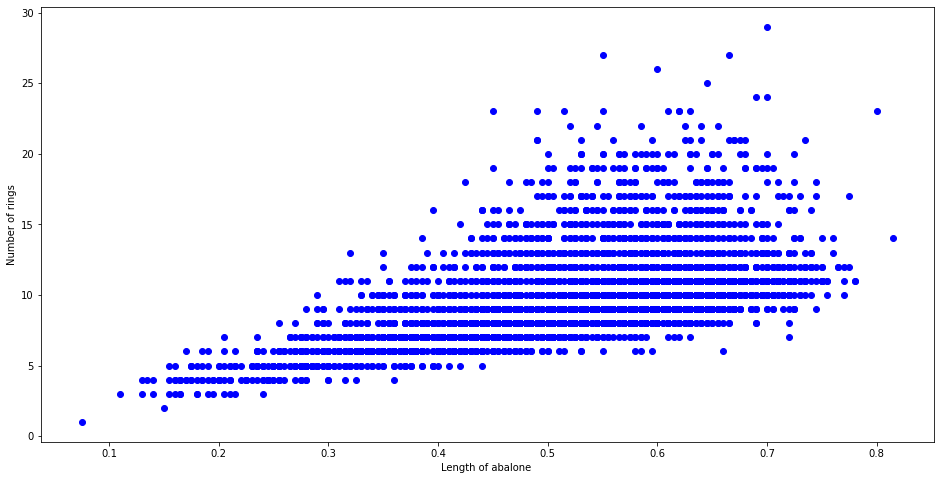

In [54]:
plt.figure(figsize=(16,8))

plt.scatter(df['Length'], df['Ring'], c='b')
plt.xlabel('Length of abalone ')
plt.ylabel('Number of rings')

plt.show()

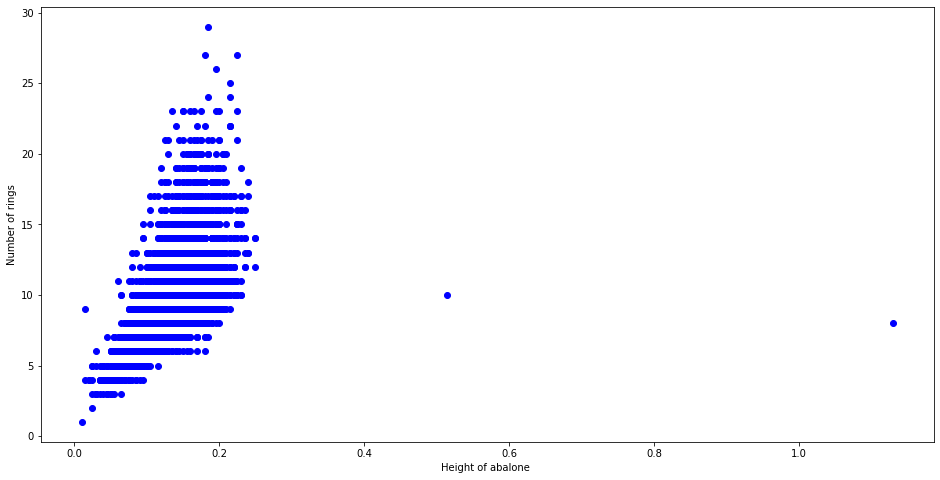

In [55]:
plt.figure(figsize=(16,8))

plt.scatter(df['Height'], df['Ring'], c='b')
plt.xlabel('Height of abalone ')
plt.ylabel('Number of rings')

plt.show()

Observations:
* Height of abalone is in range 0.0 - 0.3

## finding correlation

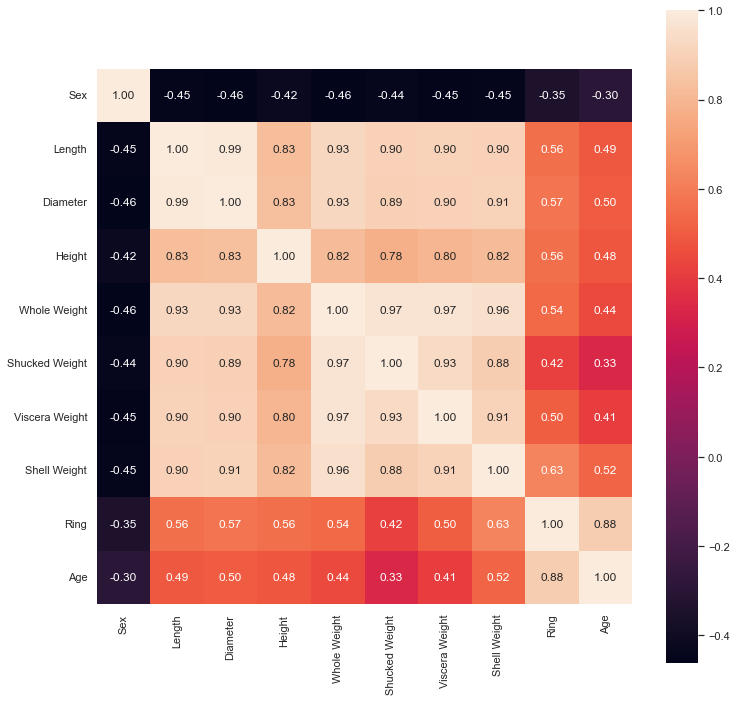

In [56]:

corr = df.corr()
plt.figure(figsize = (12,12))
sns.set(font_scale=1)
sns.heatmap(corr,cbar = True,  annot=True, square = True, fmt = '.2f')
plt.show();


<AxesSubplot:>

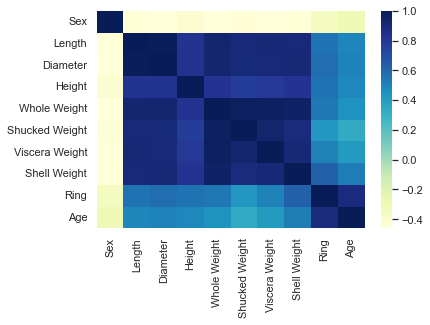

In [57]:
corr = df.corr()
sns.heatmap(corr,cmap = 'YlGnBu')

**wee see that sex row is very correlated**

** groupby "Sex" column with the mean() aggregate  **

Text(0.5, 0, 'Sex')

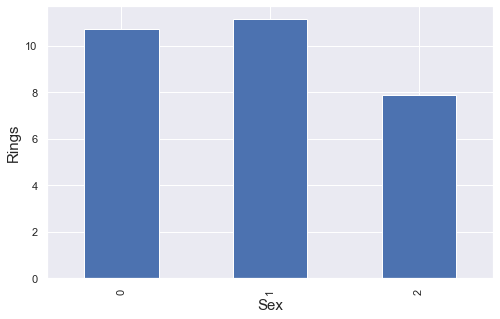

In [58]:
df.groupby(["Sex"]).mean()["Ring"].plot(kind="bar", figsize=(8, 5))
plt.ylabel("Rings", size=15)
plt.xlabel("Sex", size=15)

Observations:
* Female have more rings 
* Infants have fewer rings

## drawing histogram to see the distribution

In [59]:
col = ["Sex", "Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Shell Weight"]

In [60]:
var = df[col]

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole Weight'}>,
        <AxesSubplot:title={'center':'Shucked Weight'}>],
       [<AxesSubplot:title={'center':'Shell Weight'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

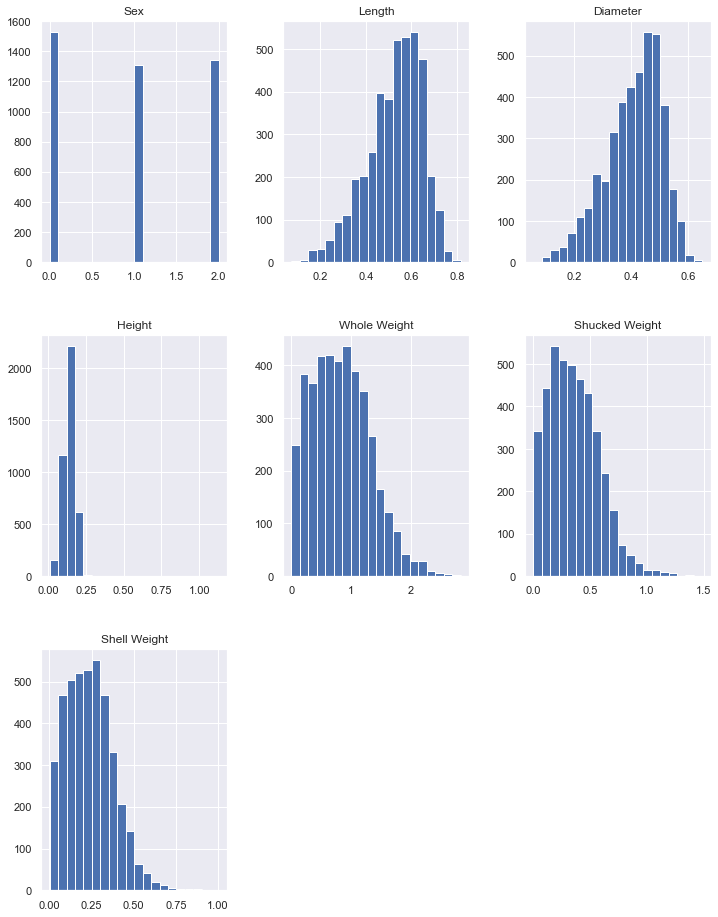

In [61]:
var.hist(bins=20, figsize=(12,16))

Observations:
* Length, Diameter are negatively skewed
* All types of weight: Whole Weight, Shucked Weight, Shell Weight are positively skewed

C:\Users\baiba\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


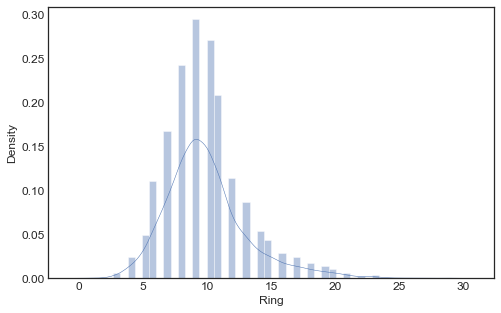

In [52]:
plt.figure(figsize = (8,5))
sns.distplot(df['Ring'])

plt.show()

Observation:
* Ring almost follows Normal Distribution 

C:\Users\baiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Rings')

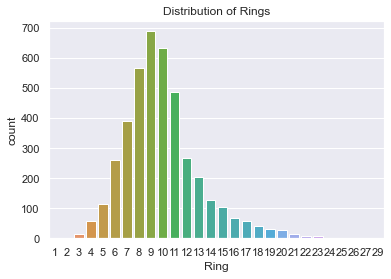

In [62]:
sns.countplot(df['Ring'])
plt.title('Distribution of Rings')

Observation:
* It appears that Abalone with Rings between 8-10 have the most observations.

### maximum heights
**order categories by counts **

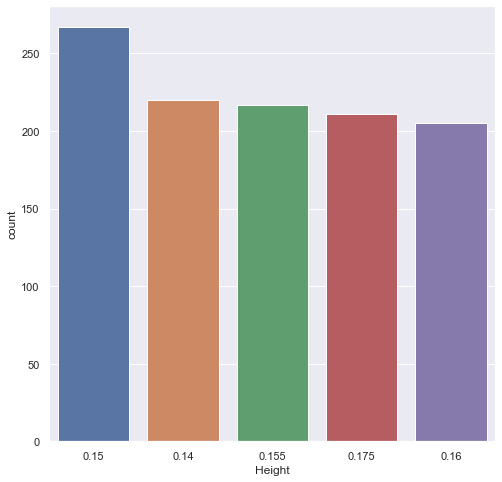

In [142]:
plt.figure(figsize = (8,8))
sns.countplot(x=df['Height'],order=df['Height'].value_counts().head().index)

plt.show()

Observation:
* maximum height is 0.15 mm 

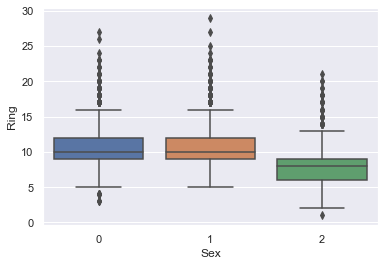

In [127]:
ax = sns.boxplot(x="Sex", y="Ring", data=df)


Observation: 
* Infants have lower number of rings compares to females and males

## Train Test Split

In [19]:
X=df.drop(['Age','Ring'], axis=1)
Y = df[['Age']]

In [20]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = model_selection.train_test_split(X, Y)

In [21]:
print("train_df_x:")
print(train_X.shape)

print("train_df_y:")
print(train_y.shape)

print("test_df_x:")
print(test_X.shape)

print("test_df_y:")
print(test_y.shape)

train_df_x:
(3132, 8)
train_df_y:
(3132, 1)
test_df_x:
(1045, 8)
test_df_y:
(1045, 1)


## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [70]:
logmodel = LogisticRegression()
logmodel.fit(train_X, train_y)

C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\baiba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
log_predictions = logmodel.predict(test_X)

In [72]:
print("MSE: ", mean_squared_error(test_y, rfc_pred))

print("Accuracy of Logistic Regression is:")
print(accuracy_score(test_y, log_predictions)*100)

MSE:  0.23732057416267943
Accuracy of Logistic Regression is:
78.4688995215311


## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [23]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train_X, train_y)

C:\Users\baiba\AppData\Local\Temp/ipykernel_14248/2387590066.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


RandomForestClassifier()

In [24]:
rfc_pred = rfc.predict(test_X)

In [25]:
print(confusion_matrix(test_y,rfc_pred))

[[ 69  43   0   0]
 [ 25 712  26   0]
 [  0 102  40   0]
 [  0   8  20   0]]


In [26]:
print("MSE: ", mean_squared_error(test_y, rfc_pred))

print("Accuracy of Random Forest is:")
print(accuracy_score(test_y, rfc_pred)*100)

MSE:  0.23732057416267943
Accuracy of Random Forest is:
78.56459330143541


## KNN Classifier

In [27]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
knn = KNeighborsClassifier(n_neighbors=9)

In [29]:
knn.fit(train_X, train_y)
pred = knn.predict(test_X)

C:\Users\baiba\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [30]:
print(confusion_matrix(test_y,pred))

[[ 66  46   0   0]
 [ 29 712  21   1]
 [  0 114  28   0]
 [  0  12  16   0]]


In [31]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           1       0.69      0.59      0.64       112
           2       0.81      0.93      0.86       763
           3       0.43      0.20      0.27       142
           4       0.00      0.00      0.00        28

    accuracy                           0.77      1045
   macro avg       0.48      0.43      0.44      1045
weighted avg       0.72      0.77      0.74      1045



In [32]:
print("MSE: ", mean_squared_error(test_y, pred))

print("Accuracy of KNN is:")
print(accuracy_score(test_y, pred)*100)

MSE:  0.2660287081339713
Accuracy of KNN is:
77.12918660287082


## SVM

In [33]:
from sklearn.svm import SVC

In [34]:
mySVC = SVC()

In [35]:
mySVC.fit(train_X, train_y)

y_predictions = mySVC.predict(test_X)

C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [36]:
print(confusion_matrix(test_y, y_predictions))

[[ 60  52   0   0]
 [ 20 741   2   0]
 [  0 138   4   0]
 [  0  27   1   0]]


In [37]:
print(classification_report(test_y, y_predictions))

              precision    recall  f1-score   support

           1       0.75      0.54      0.63       112
           2       0.77      0.97      0.86       763
           3       0.57      0.03      0.05       142
           4       0.00      0.00      0.00        28

    accuracy                           0.77      1045
   macro avg       0.52      0.38      0.38      1045
weighted avg       0.72      0.77      0.70      1045



C:\Users\baiba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\baiba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\baiba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
print("MSE: ", mean_squared_error(test_y, y_predictions))

print("Accuracy of SVM is:")
print(accuracy_score(test_y, y_predictions)*100)

MSE:  0.307177033492823
Accuracy of SVM is:
77.03349282296651


## GridSearch

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]}

In [41]:
myGS = GridSearchCV(SVC(), param_grid = param_grid, verbose = 3)
myGS.fit(train_X, train_y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ....................C=0.1, gamma=1;, score=0.767 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ....................C=0.1, gamma=1;, score=0.751 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ....................C=0.1, gamma=1;, score=0.768 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....................C=0.1, gamma=1;, score=0.770 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ....................C=0.1, gamma=1;, score=0.773 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.724 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.724 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.724 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .................C=0.1, gamma=0.01;, score=0.724 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .................C=0.1, gamma=0.01;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .................C=0.1, gamma=0.01;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .................C=0.1, gamma=0.01;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ................C=0.1, gamma=0.001;, score=0.724 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ................C=0.1, gamma=0.001;, score=0.724 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ................C=0.1, gamma=0.001;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ................C=0.1, gamma=0.001;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ................C=0.1, gamma=0.001;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...............C=0.1, gamma=0.0001;, score=0.724 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...............C=0.1, gamma=0.0001;, score=0.724 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...............C=0.1, gamma=0.0001;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...............C=0.1, gamma=0.0001;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...............C=0.1, gamma=0.0001;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ......................C=1, gamma=1;, score=0.766 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ......................C=1, gamma=1;, score=0.756 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ......................C=1, gamma=1;, score=0.770 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ......................C=1, gamma=1;, score=0.768 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ......................C=1, gamma=1;, score=0.778 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ....................C=1, gamma=0.1;, score=0.766 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ....................C=1, gamma=0.1;, score=0.751 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ....................C=1, gamma=0.1;, score=0.772 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....................C=1, gamma=0.1;, score=0.770 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ....................C=1, gamma=0.1;, score=0.773 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...................C=1, gamma=0.01;, score=0.724 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...................C=1, gamma=0.01;, score=0.724 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...................C=1, gamma=0.01;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...................C=1, gamma=0.01;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...................C=1, gamma=0.01;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ..................C=1, gamma=0.001;, score=0.724 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..................C=1, gamma=0.001;, score=0.724 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..................C=1, gamma=0.001;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..................C=1, gamma=0.001;, score=0.727 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..................C=1, gamma=0.001;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .................C=1, gamma=0.0001;, score=0.724 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .................C=1, gamma=0.0001;, score=0.724 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .................C=1, gamma=0.0001;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .................C=1, gamma=0.0001;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .................C=1, gamma=0.0001;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .....................C=10, gamma=1;, score=0.791 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .....................C=10, gamma=1;, score=0.774 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .....................C=10, gamma=1;, score=0.799 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .....................C=10, gamma=1;, score=0.780 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .....................C=10, gamma=1;, score=0.807 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...................C=10, gamma=0.1;, score=0.769 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...................C=10, gamma=0.1;, score=0.761 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...................C=10, gamma=0.1;, score=0.781 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...................C=10, gamma=0.1;, score=0.770 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...................C=10, gamma=0.1;, score=0.780 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ..................C=10, gamma=0.01;, score=0.766 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..................C=10, gamma=0.01;, score=0.753 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..................C=10, gamma=0.01;, score=0.776 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..................C=10, gamma=0.01;, score=0.767 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..................C=10, gamma=0.01;, score=0.778 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .................C=10, gamma=0.001;, score=0.724 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .................C=10, gamma=0.001;, score=0.724 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .................C=10, gamma=0.001;, score=0.727 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .................C=10, gamma=0.001;, score=0.727 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .................C=10, gamma=0.001;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ................C=10, gamma=0.0001;, score=0.724 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ................C=10, gamma=0.0001;, score=0.724 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ................C=10, gamma=0.0001;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ................C=10, gamma=0.0001;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ................C=10, gamma=0.0001;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ....................C=100, gamma=1;, score=0.789 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ....................C=100, gamma=1;, score=0.764 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ....................C=100, gamma=1;, score=0.802 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....................C=100, gamma=1;, score=0.784 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ....................C=100, gamma=1;, score=0.804 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ..................C=100, gamma=0.1;, score=0.789 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..................C=100, gamma=0.1;, score=0.775 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..................C=100, gamma=0.1;, score=0.788 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..................C=100, gamma=0.1;, score=0.791 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..................C=100, gamma=0.1;, score=0.799 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .................C=100, gamma=0.01;, score=0.769 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .................C=100, gamma=0.01;, score=0.764 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .................C=100, gamma=0.01;, score=0.788 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .................C=100, gamma=0.01;, score=0.768 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .................C=100, gamma=0.01;, score=0.786 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ................C=100, gamma=0.001;, score=0.766 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ................C=100, gamma=0.001;, score=0.753 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ................C=100, gamma=0.001;, score=0.776 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ................C=100, gamma=0.001;, score=0.767 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ................C=100, gamma=0.001;, score=0.776 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...............C=100, gamma=0.0001;, score=0.724 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...............C=100, gamma=0.0001;, score=0.724 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...............C=100, gamma=0.0001;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...............C=100, gamma=0.0001;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...............C=100, gamma=0.0001;, score=0.727 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...................C=1000, gamma=1;, score=0.794 total time=   0.9s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...................C=1000, gamma=1;, score=0.758 total time=   0.7s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...................C=1000, gamma=1;, score=0.807 total time=   0.9s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...................C=1000, gamma=1;, score=0.786 total time=   0.6s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...................C=1000, gamma=1;, score=0.804 total time=   0.7s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .................C=1000, gamma=0.1;, score=0.780 total time=   0.4s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .................C=1000, gamma=0.1;, score=0.780 total time=   0.4s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .................C=1000, gamma=0.1;, score=0.796 total time=   0.4s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .................C=1000, gamma=0.1;, score=0.784 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .................C=1000, gamma=0.1;, score=0.804 total time=   0.5s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ................C=1000, gamma=0.01;, score=0.791 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ................C=1000, gamma=0.01;, score=0.775 total time=   0.4s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ................C=1000, gamma=0.01;, score=0.794 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ................C=1000, gamma=0.01;, score=0.786 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ................C=1000, gamma=0.01;, score=0.805 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...............C=1000, gamma=0.001;, score=0.772 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...............C=1000, gamma=0.001;, score=0.764 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...............C=1000, gamma=0.001;, score=0.789 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...............C=1000, gamma=0.001;, score=0.765 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...............C=1000, gamma=0.001;, score=0.788 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ..............C=1000, gamma=0.0001;, score=0.766 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..............C=1000, gamma=0.0001;, score=0.753 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..............C=1000, gamma=0.0001;, score=0.776 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..............C=1000, gamma=0.0001;, score=0.767 total time=   0.2s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..............C=1000, gamma=0.0001;, score=0.776 total time=   0.3s


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [42]:
y_prediction = myGS.predict(test_X)

In [43]:
print(classification_report(test_y, y_prediction))

              precision    recall  f1-score   support

           1       0.76      0.57      0.65       112
           2       0.81      0.96      0.88       763
           3       0.46      0.18      0.26       142
           4       0.00      0.00      0.00        28

    accuracy                           0.79      1045
   macro avg       0.51      0.43      0.45      1045
weighted avg       0.74      0.79      0.75      1045



C:\Users\baiba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\baiba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\baiba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
print("MSE: ", mean_squared_error(test_y, y_prediction))

print("Accuracy of GridSearch is:")
print(accuracy_score(test_y, y_prediction)*100)

MSE:  0.23253588516746412
Accuracy of GridSearch is:
78.75598086124403


## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5)

In [47]:
predictions = dtree.predict(test_X)
print(classification_report(test_y,predictions))

              precision    recall  f1-score   support

           1       0.79      0.57      0.66       112
           2       0.80      0.95      0.87       763
           3       0.43      0.15      0.23       142
           4       0.00      0.00      0.00        28

    accuracy                           0.78      1045
   macro avg       0.50      0.42      0.44      1045
weighted avg       0.72      0.78      0.73      1045



C:\Users\baiba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\baiba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\baiba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
print("MSE: ", mean_squared_error(test_y, predictions))

print("Accuracy of DecisionTree is:")
print(accuracy_score(test_y, predictions)*100)

MSE:  0.27751196172248804
Accuracy of DecisionTree is:
77.70334928229666


## Calculating of all models above

In [73]:
value = {'Accuracy' : [round((accuracy_score(test_y, predictions)*100), 3),
                       round((accuracy_score(test_y, y_prediction)*100), 3),
                       round((accuracy_score(test_y, y_predictions)*100), 3),
                       round((accuracy_score(test_y, pred)*100),3),
                       round((accuracy_score(test_y, rfc_pred)*100), 3),
                       round((accuracy_score(test_y, log_predictions)*100), 3)],
         'MSE' : [round(mean_squared_error(test_y, predictions), 3),
                  round(mean_squared_error(test_y, y_prediction), 3),
                  round(mean_squared_error(test_y, y_predictions), 3),
                  round(mean_squared_error(test_y, pred), 3),
                  round(mean_squared_error(test_y, rfc_pred), 3),
                  round(mean_squared_error(test_y, log_predictions), 3)]
        
        }

index = ['Decision Tree',
          'GridSearch',
          'SVM',
          'KNN Classifier',
          'Random Forest',
          'Logistic Regression'
         
        ]

In [74]:
pd.DataFrame(value, index=index)

,Accuracy,MSE
Decision Tree,77.703,0.278
GridSearch,78.756,0.233
SVM,77.033,0.307
KNN Classifier,77.129,0.266
Random Forest,78.565,0.237
Logistic Regression,78.469,0.258


**My accuracy is within 77-78%, which is better than my endterm part**

## Where is change from my Endterm project?

**I took your advice to divide the age with a difference of 5 years, and add more age groups**

**With this advice, my accuracy has improved. In a previous endterm project my best accuracy was 60%**

**Adding Logistic Regression**